<a href="https://colab.research.google.com/github/Bruno-Noriaki/Indicium/blob/main/Indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

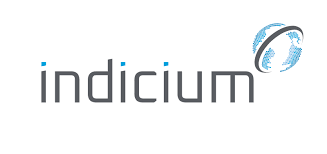

**Canditato: Bruno Noriaki de Moura Tsuha**

Projeto Desenvolvido durante processo seletivo para Estágio em Ciência de Dados na Indicium



Dataset e problematização disponíveis em :https://drive.google.com/drive/folders/1r9NoX3HYIOyKceCaQwuhUlRPMG9dG-mX

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10, 8)

# Formatação dos dados, duplicatas e dados nulos

In [3]:
treino = pd.read_excel('/content/Treino.xlsx')
teste = pd.read_excel('/content/Teste.xlsx')

In [6]:
#Analisando os formatos de cada feature
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [7]:
#num_fotos, dados vazios nessa classe indicam a ausência de fotos, preencherei os dados nulos com 0
treino['num_fotos'].unique()

treino['num_fotos'] = treino['num_fotos'].fillna(0)
teste['num_fotos'] = teste['num_fotos'].fillna(0)

#dono_aceita_troca, dados vazios aqui indicam que não aceitam troca, assim, transformarei essa coluna em binária
#onde 0 = não aceita, 1 = aceita

treino['dono_aceita_troca'] = treino['dono_aceita_troca'].fillna(0)
treino['dono_aceita_troca'] = treino['dono_aceita_troca'].replace({'Aceita troca':1})

teste['dono_aceita_troca'] = teste['dono_aceita_troca'].fillna(0)
teste['dono_aceita_troca'] = teste['dono_aceita_troca'].replace({'Aceita troca':1})

#veiculo_único_dono, dados nulos indicam que o carro não teve um único dono, assim, também tornarei essa coluna binária
#onde 0 = único dono, 1 = Não teve um único dono

treino['veiculo_único_dono'] = treino['veiculo_único_dono'].fillna(0)
treino['veiculo_único_dono'] = treino['veiculo_único_dono'].replace({'Único dono': 1})

teste['veiculo_único_dono'] = teste['veiculo_único_dono'].fillna(0)
teste['veiculo_único_dono'] = teste['veiculo_único_dono'].replace({'Único dono': 1})

#revisoes_concessionaria, dados nulos indicam que nem todas as revisões foram feitas pela concessionária, assim, coluna binária
#onde 0 = Todas as revisões feitas pela concessionária, 1 = nem todas as revisões foram feitas pela concessionária

treino['revisoes_concessionaria'] = treino['revisoes_concessionaria'].fillna(0)
treino['revisoes_concessionaria'] = treino['revisoes_concessionaria'].replace({'Todas as revisões feitas pela concessionária': 1})

teste['revisoes_concessionaria'] = teste['revisoes_concessionaria'].fillna(0)
teste['revisoes_concessionaria'] = teste['revisoes_concessionaria'].replace({'Todas as revisões feitas pela concessionária': 1})

#ipva_pago, dados nulos indicam que o IPVA não está pago, coluna também binária
#onde 0 = IPVA não pago, 1 = IPVA pago
treino['ipva_pago'] = treino['ipva_pago'].fillna(0)
treino['ipva_pago'] = treino['ipva_pago'].replace({'IPVA pago': 1})

teste['ipva_pago'] = teste['ipva_pago'].fillna(0)
teste['ipva_pago'] = teste['ipva_pago'].replace({'IPVA pago': 1})

#veiculo_licenciado, dados nulos indicam que o veículo não está licenciado, coluna binária
#onde 0 = Não licenciado, 1 = Licenciado
treino['veiculo_licenciado'] = treino['veiculo_licenciado'].fillna(0)
treino['veiculo_licenciado'] = treino['veiculo_licenciado'].replace({'Licenciado': 1})

teste['veiculo_licenciado'] = teste['veiculo_licenciado'].fillna(0)
teste['veiculo_licenciado'] = teste['veiculo_licenciado'].replace({'Licenciado': 1})

#garantia_de_fábrica, dados nulos indicam que o veículo não possui garantia de fábrica, coluna binária
#onde 0 = Sem Garantia de fábrica, 1 = Garantia de fábrica
treino['garantia_de_fábrica'] = treino['garantia_de_fábrica'].fillna(0)
treino['garantia_de_fábrica'] = treino['garantia_de_fábrica'].replace({'Garantia de fábrica': 1})

teste['garantia_de_fábrica'] = teste['garantia_de_fábrica'].fillna(0)
teste['garantia_de_fábrica'] = teste['garantia_de_fábrica'].replace({'Garantia de fábrica': 1})

#garantia_de_fábrica, dados nulos indicam que as revisões não foram feitas pela agenda do carro, coluna binária
#onde 0 = revisões não foram feitas pela agenda do carro, 1 = Todas as revisões feitas pela agenda do carro
treino['revisoes_dentro_agenda'] = treino['revisoes_dentro_agenda'].fillna(0)
treino['revisoes_dentro_agenda'] = treino['revisoes_dentro_agenda'].replace({'Todas as revisões feitas pela agenda do carro': 1})

teste['revisoes_dentro_agenda'] = teste['revisoes_dentro_agenda'].fillna(0)
teste['revisoes_dentro_agenda'] = teste['revisoes_dentro_agenda'].replace({'Todas as revisões feitas pela agenda do carro': 1})

In [8]:
#Por último, a coluna veiculo_alienado apresenta todos os dados nulos, assim, não terá qualquer utilidade dentro do modelo
#Podendo ser dropada
treino = treino.drop('veiculo_alienado', axis = 1)

teste = teste.drop('veiculo_alienado', axis = 1)

In [9]:
#Não há linhas duplicadas no data set
print(treino.duplicated().sum())
print(teste.duplicated().sum())

0
0


# Estatísticas

In [10]:
treino.drop(['id'], axis = 1).describe()
#A maior parte dos carros são de modelos e fabricados depois de 2015
#Maioria carros com 4 portas, a maior parte dos vendedores aceitam trocas
#Menor parte é de único dono, tem revisões em concessionárias, garantia de fábrica e revisões dentro da agenda
#Cerca de metade dos veículos são licenciados

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.262067,2016.758552,2017.808985,58430.592077,3.940677,0.741009,0.352319,0.310032,0.664515,0.537655,0.147546,0.199770,1.330239e+05
std,3.566878,4.062422,2.673930,32561.769309,0.338360,0.438088,0.477701,0.462514,0.472168,0.498588,0.354655,0.399834,8.166287e+04
min,0.000000,1985.000000,1997.000000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.359813e+06


In [11]:
teste.drop(['id'], axis = 1).describe()
#Nota-se que as características gerais numéricas estão distribuídas de forma semelhante nos dois data sets
#Um bom indicativo para o modelo

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda
count,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000
mean,10.261002,2016.716893,2017.801663,58237.207057,3.942507,0.741026,0.352363,0.310992,0.665585,0.541878,0.144291,0.202089
std,3.543952,4.151105,2.679667,32487.018991,0.333749,0.438093,0.477730,0.462923,0.471809,0.498268,0.351403,0.401578
min,0.000000,1988.000000,2007.000000,100.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2015.000000,2016.000000,31323.250000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2018.000000,2018.000000,56742.000000,4.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,14.000000,2019.000000,2020.000000,81784.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,21.000000,2022.000000,2023.000000,381728.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribuição das marcas

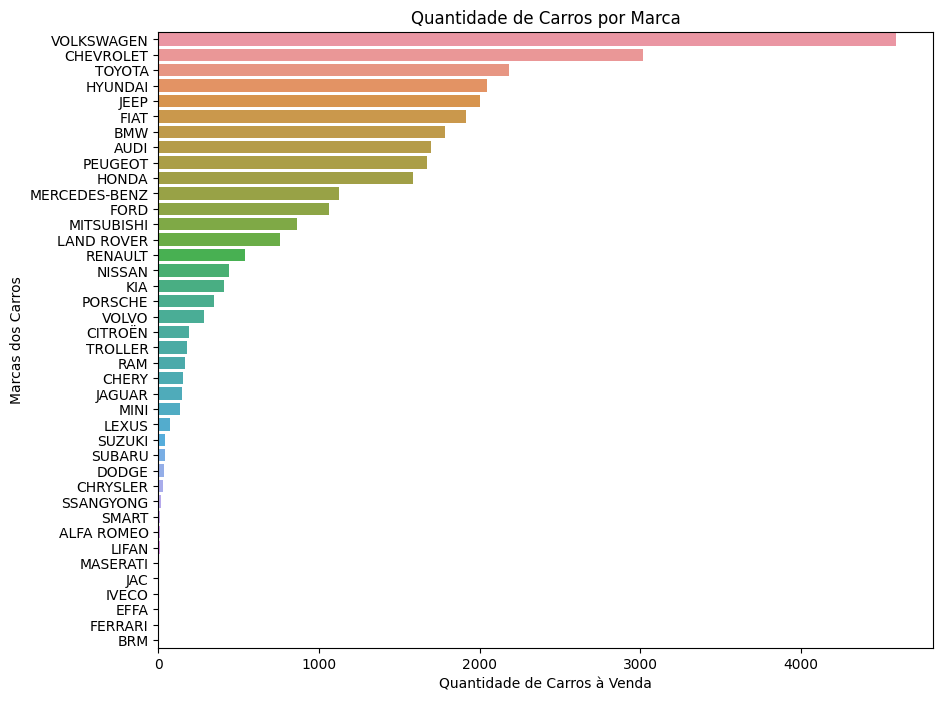

In [ ]:
#Distribuição de carros por marca
y = treino['marca'].value_counts()
sns.barplot(y = y.index, x = y.values);
plt.xlabel('Quantidade de Carros à Venda');
plt.ylabel('Marcas dos Carros');
plt.title('Quantidade de Carros por Marca');
#Nota-se uma grande quantidade de carros Volkswagen, Chevrolet, Toyota, Hyundai, Jeep e Fiat para vendas

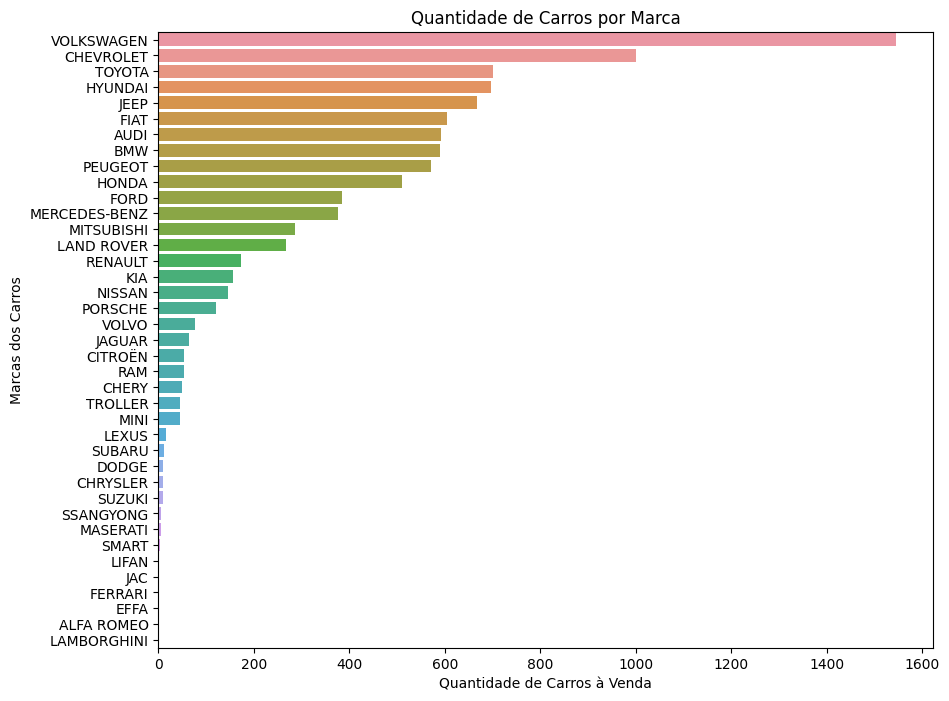

In [12]:
y = teste['marca'].value_counts()
sns.barplot(y = y.index, x = y.values);
plt.xlabel('Quantidade de Carros à Venda');
plt.ylabel('Marcas dos Carros');
plt.title('Quantidade de Carros por Marca');

Apesar de haverem algumas marcas que não são comuns aos dois bancos, as distribuições dos carros por marca também se assemelham

## Distribuição de Preço

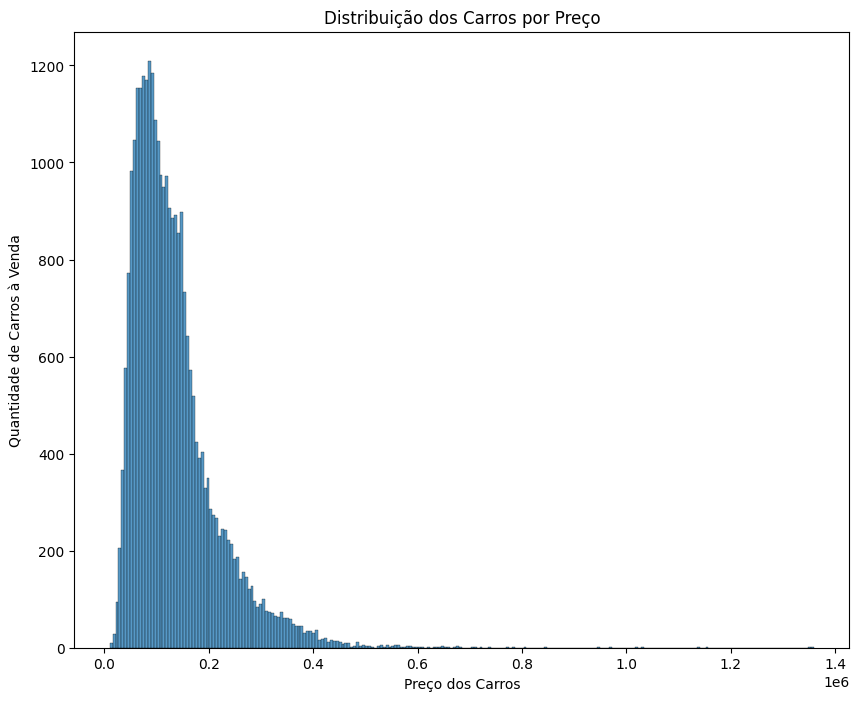

In [ ]:
sns.histplot(treino['preco']);
plt.ylabel('Quantidade de Carros à Venda');
plt.xlabel('Preço dos Carros');
plt.title('Distribuição dos Carros por Preço');
#Aqui nota-se uma maior concentração de carros mais baratos e uma redução considerável com o aumento do preço

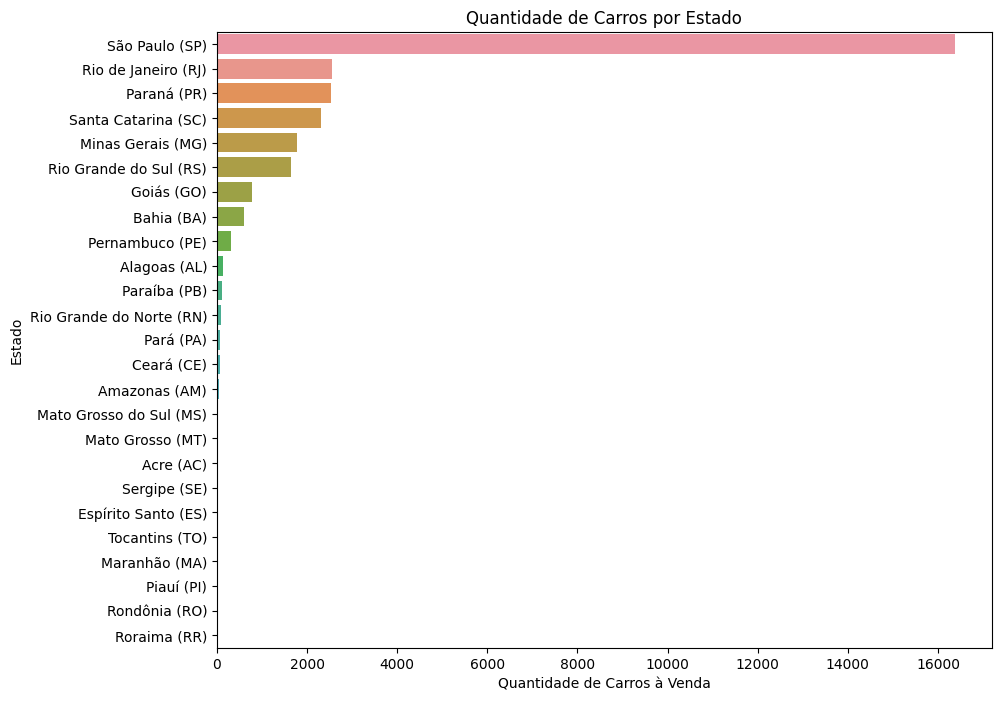

In [ ]:
y = treino['estado_vendedor'].value_counts()
sns.barplot(y = y.index, x = y.values);
plt.xlabel('Quantidade de Carros à Venda');
plt.ylabel('Estado');
plt.title('Quantidade de Carros por Estado');
#Maioria esmagadora de carros à disposição no estado de São Paulo, seguido de Rio de Janeiro, Paraná, Santa Cataria e Minas Gerais

## Distribuição dos preços por marca

In [ ]:
a = treino.groupby('marca').agg({'preco': ['min', 'max', 'mean','count']}).sort_values(by =('preco','mean'))

In [ ]:
b = a[a[('preco', 'count')] > 100].head(10)

In [ ]:
b.index

Index(['CITROËN', 'RENAULT', 'HYUNDAI', 'CHEVROLET', 'FIAT', 'HONDA', 'NISSAN',
       'VOLKSWAGEN', 'CHERY', 'PEUGEOT'],
      dtype='object', name='marca')

Com o alto número de dados, selecionei as 10 marcas com o média menor de preço, porém, com pelo menos 100 amostras de carros a venda como as marcas populares sendo 'CITROËN', 'RENAULT', 'HYUNDAI', 'CHEVROLET', 'FIAT', 'HONDA', 'NISSAN','VOLKSWAGEN', 'CHERY', 'PEUGEOT'

Nesse sentido, as variáveis escolhidas de preço, marca e localização permite definir quais são as marcas com preços mais acessíveis, os estados com as maiores ofertas de venda de carro usados também qual a distribuição dos preços ofertados

# Entregáveis - Hipóteses de Negócio


## Hipóteses da Indicium

**a - Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?**

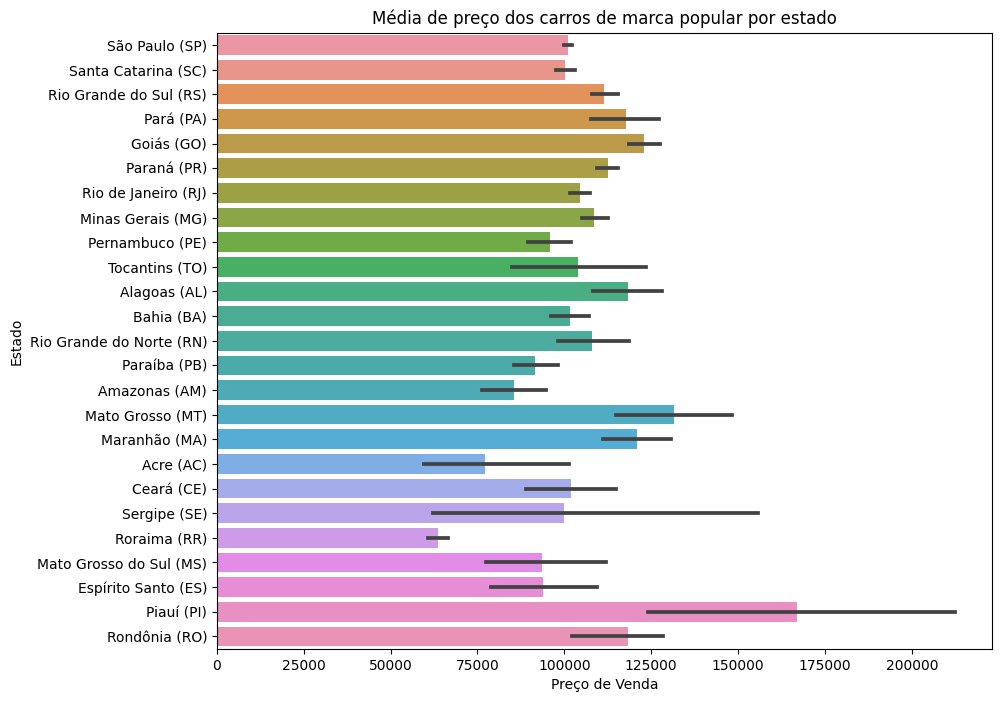

In [24]:
#Para essa resposta
marcas_pop = ['CITROËN', 'RENAULT', 'HYUNDAI', 'CHEVROLET',
 'FIAT', 'HONDA', 'NISSAN','VOLKSWAGEN', 'CHERY', 'PEUGEOT']

y = treino[treino['marca'].isin(marcas_pop)]
sns.barplot(data = y, x = 'preco', y = 'estado_vendedor');
plt.xlabel('Preço de Venda');
plt.ylabel('Estado');
plt.title('Média de preço dos carros de marca popular por estado');

Aqui vemos que a média de preço para as marcas populares é maior no Piauí, assim, esse seria o estado para melhor venda de carros dessa marca

**b - Qual o melhor estado para se comprar uma picape
com transmissão automática e por quê?**





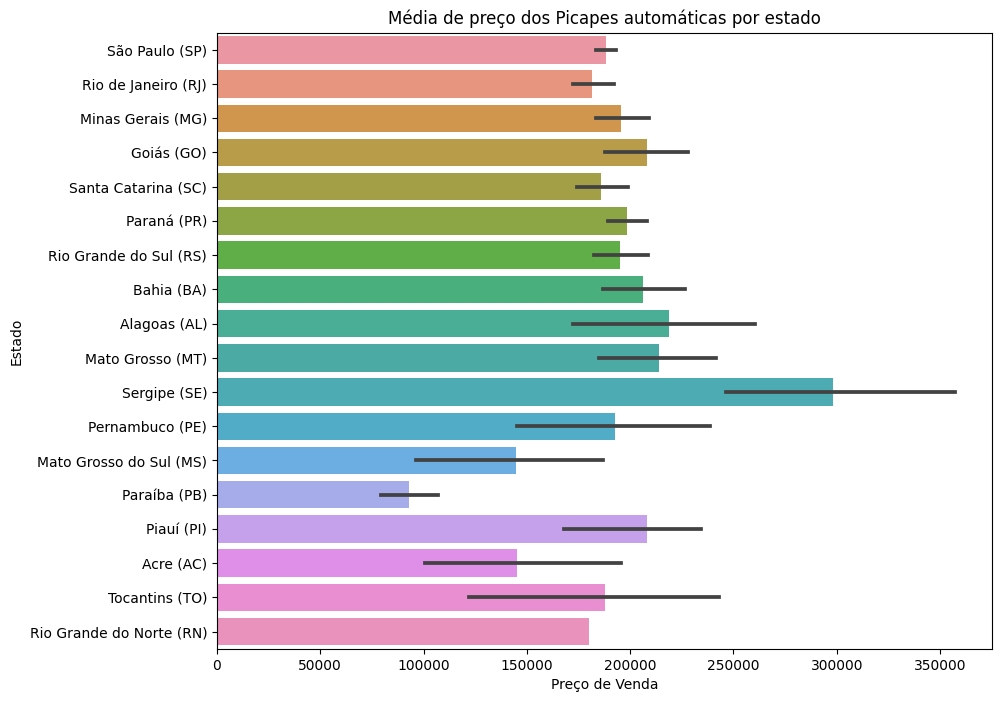

In [27]:
#Para essa resposta

y = treino[(treino['cambio'] == 'Automática') & (treino['tipo'] == 'Picape')]

sns.barplot(data = y, x = 'preco', y = 'estado_vendedor');
plt.xlabel('Preço de Venda');
plt.ylabel('Estado');
plt.title('Média de preço dos Picapes automáticas por estado');

Aqui, para se comprar, escolheria o estado com a menor média de preços para as características desejadas, no caso Paraíba

**c - Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?**

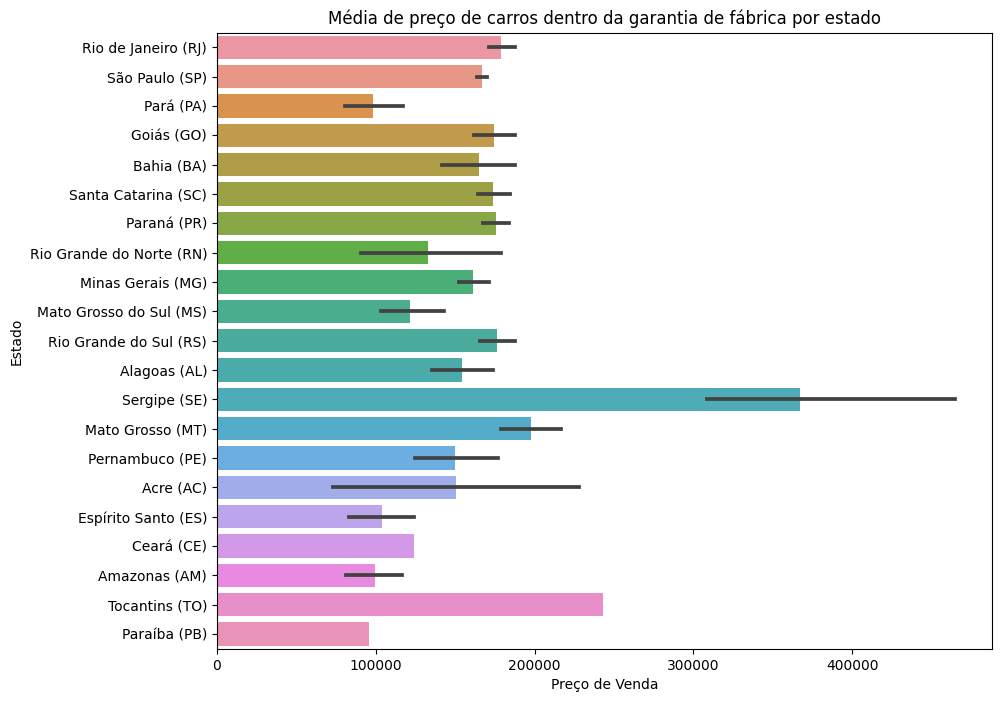

In [29]:
#Para essa resposta

y = treino[(treino['garantia_de_fábrica'] == 1)]

sns.barplot(data = y, x = 'preco', y = 'estado_vendedor');
plt.xlabel('Preço de Venda');
plt.ylabel('Estado');
plt.title('Média de preço de carros dentro da garantia de fábrica por estado');

Aqui, a Paraíba novamente se mostra o melhor estado em relação a preços para adquirir um veículo com garantia de fábrica

## Hipóteses do Cientista

**a - Seria melhor investir na venda de carros de fabricação mais recente?**

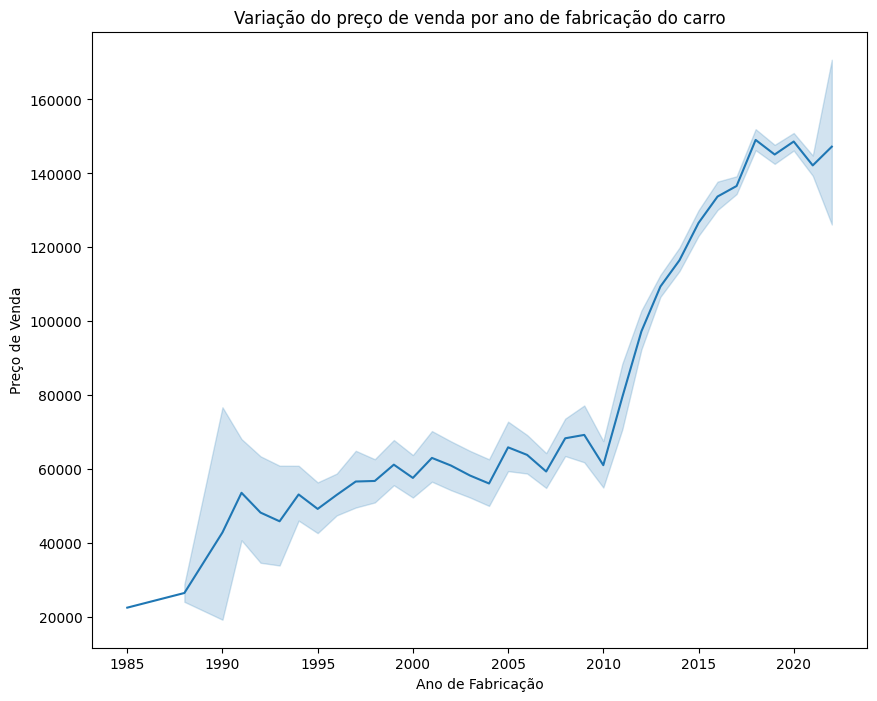

In [39]:
sns.lineplot(data = treino, y = 'preco', x = 'ano_de_fabricacao');
plt.xlabel('Ano de Fabricação');
plt.ylabel('Preço de Venda');
plt.title('Variação do preço de venda por ano de fabricação do carro');

Aqui vemos uma relação grande entre o ano de fabricação e o preço de venda, assim, seria interessante focar em carros mais novos

**b - As revisões feitas conforme a agenda valorizam os carros de um mesmo tipo?**

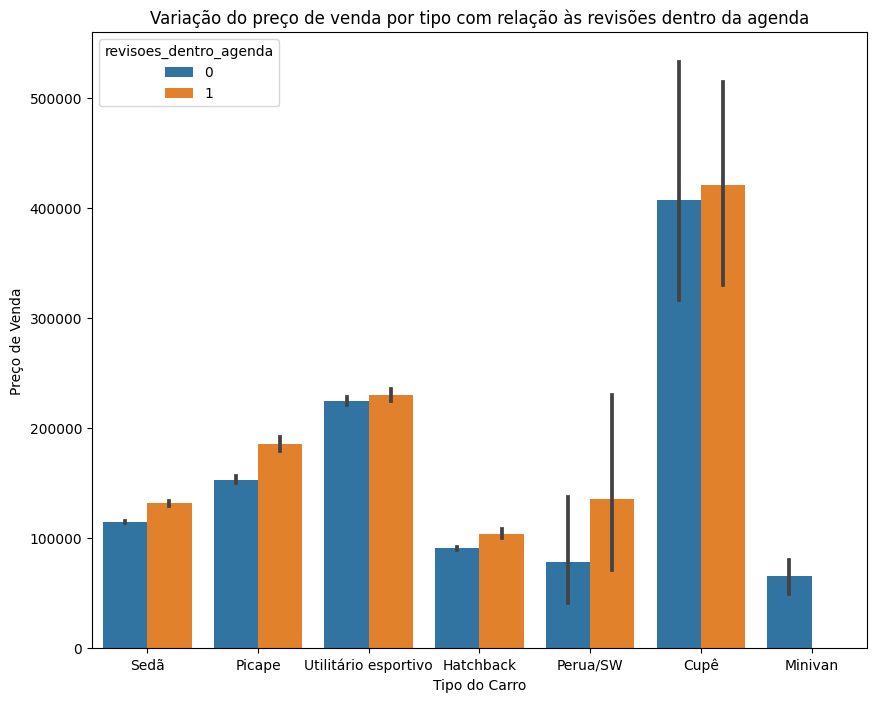

In [42]:
sns.barplot(data = treino, y = 'preco', x = 'tipo', hue ='revisoes_dentro_agenda');
plt.xlabel('Tipo do Carro');
plt.ylabel('Preço de Venda');
plt.title('Variação do preço de venda por tipo com relação às revisões dentro da agenda');

Há um aumento não muito grande da média de preço para todos os tipos de carro em decorrência da revisões feitas no carro

**c - Há influência do estado nas marcas mais vendidas?**

In [97]:
marca_mais_vendida = treino.groupby('estado_vendedor')['marca'].value_counts().groupby(level=0).idxmax()
marca_mais_vendida

estado_vendedor
Acre (AC)                                   (Acre (AC), CITROËN)
Alagoas (AL)                          (Alagoas (AL), VOLKSWAGEN)
Amazonas (AM)                              (Amazonas (AM), FIAT)
Bahia (BA)                               (Bahia (BA), CHEVROLET)
Ceará (CE)                                 (Ceará (CE), PEUGEOT)
Espírito Santo (ES)             (Espírito Santo (ES), CHEVROLET)
Goiás (GO)                              (Goiás (GO), VOLKSWAGEN)
Maranhão (MA)                           (Maranhão (MA), PEUGEOT)
Mato Grosso (MT)                     (Mato Grosso (MT), PEUGEOT)
Mato Grosso do Sul (MS)          (Mato Grosso do Sul (MS), FIAT)
Minas Gerais (MG)                (Minas Gerais (MG), VOLKSWAGEN)
Paraná (PR)                            (Paraná (PR), VOLKSWAGEN)
Paraíba (PB)                           (Paraíba (PB), CHEVROLET)
Pará (PA)                                   (Pará (PA), PEUGEOT)
Pernambuco (PE)                    (Pernambuco (PE), VOLKSWAGEN)
Piauí (PI

In [88]:
estado = []
marca = []
for i in range(0,25):
  estado.append(marca_mais_vendida[i][0])
  marca.append(marca_mais_vendida[i][1])
marca = pd.Series(marca)

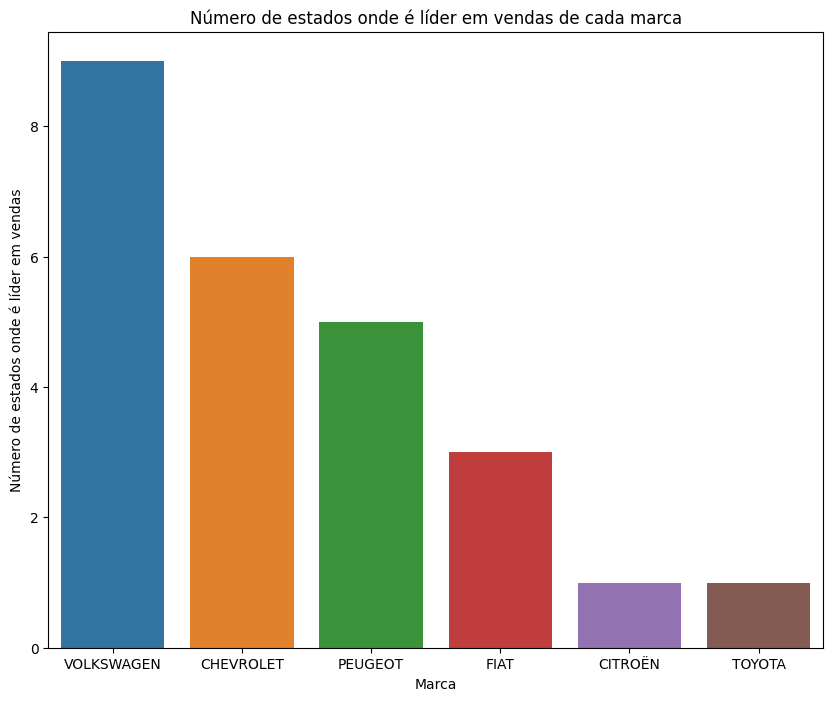

In [92]:
y = marca.value_counts()
sns.barplot(y = y, x = y.index);
plt.xlabel('Marca');
plt.ylabel('Número de estados onde é líder em vendas');
plt.title('Número de estados onde é líder em vendas de cada marca');

Há uma variação dos líderes de venda em cada estado, contudo, a Volkswagen apresenta maior número de estados onde está liderando as vendas

# Tratamento de cada uma das Features

## Dados Booleanos

In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

In [ ]:
#As colunas entrega_delivery, troca, elegivel_revisao serão transformadas em binárias a fim de manter um padrão para otimização dos modelos
treino['entrega_delivery'] = treino['entrega_delivery'].replace({True: 0, False:1})
treino['troca'] = treino['troca'].replace({True: 0, False:1})
treino['elegivel_revisao'] = treino['elegivel_revisao'].replace({True: 0, False:1})

teste['entrega_delivery'] = teste['entrega_delivery'].replace({True: 0, False:1})
teste['troca'] = teste['troca'].replace({True: 0, False:1})
teste['elegivel_revisao'] = teste['elegivel_revisao'].replace({True: 0, False:1})

In [ ]:
#Nota-se também que a coluna blindado trata-se de um dado binário, porém marcado em 'S' e 'N', assim, também transformarei para binário
treino['blindado'] =treino['blindado'].replace({'N': 0, 'S':1})

teste['blindado'] =teste['blindado'].replace({'N': 0, 'S':1})

## Dados Numéricos

In [ ]:
#Aqui, irei alterar de 'float' para 'int' todas as variáveis possíveis a fim de otimizar o modelo
#ano_modelo, hodometro, num_fotos
treino['hodometro'] = treino['hodometro'].astype(int)
treino['ano_modelo'] = treino['ano_modelo'].astype(int)
treino['num_fotos'] = treino['num_fotos'].astype(int)

teste['hodometro'] = teste['hodometro'].astype(int)
teste['ano_modelo'] = teste['ano_modelo'].astype(int)
teste['num_fotos'] = teste['num_fotos'].astype(int)

## Dados categóricos

In [ ]:
cat = ['marca', 'modelo', 'versao', 'cambio', 'tipo', 'cor', 'tipo_vendedor','cidade_vendedor', 'estado_vendedor',
      'anunciante']
for i in cat:
  print(f'{i}: {len(treino[i].unique())}')

marca: 40
modelo: 457
versao: 1916
cambio: 7
tipo: 7
cor: 7
tipo_vendedor: 2
cidade_vendedor: 575
estado_vendedor: 25
anunciante: 4


In [ ]:
#Para tipo_vendedor, como há apenas duas categorias, transformarei também em binário
#onde PF = 0 , PJ = 1
treino['tipo_vendedor'] = treino['tipo_vendedor'].replace({'PF':0 , 'PJ':1})
teste['tipo_vendedor'] = teste['tipo_vendedor'].replace({'PF':0 , 'PJ':1})

## Categorias dropáveis
Utilizarei apenas uma categoria de localização, no caso Estado, além disso, para o modelo, o ID não será necessário, podendo ser dropado

In [ ]:
treino = treino.drop(['cidade_vendedor'],axis = 1)
teste = teste.drop('cidade_vendedor',axis = 1)

## One Hot Enconder
As features que não apresentam tantas variáveis e também não são ordenadas serão transformadas a partir do OneHotEncoder, nesse caso, cor, anunciante, marca, modelo, estado e tipo

In [ ]:
print(treino.shape,teste.shape)

(29584, 27) (9862, 26)


In [ ]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
teste['modelo'] = teste['modelo'].apply(lambda x: str(x))
cat = ['cor','anunciante','marca','modelo','estado_vendedor','tipo']

In [ ]:
hot = OneHotEncoder()

treino_enc = hot.fit_transform(treino[cat])

columns = hot.get_feature_names_out(cat)

treino_enc = pd.DataFrame(data = treino_enc.toarray(), columns = columns)

treino = pd.concat([treino.drop(cat, axis = 1),treino_enc], axis =1)

In [ ]:
hot = OneHotEncoder()

teste_enc = hot.fit_transform(teste[cat])

columns = hot.get_feature_names_out(cat)

teste_enc = pd.DataFrame(data = teste_enc.toarray(), columns = columns)

teste = pd.concat([teste.drop(cat, axis =1),teste_enc], axis =1 )

In [ ]:
treino_linhas = treino.shape[0]
teste_linhas = teste.shape[0]

treino_cols = treino.drop(['id','preco'], axis = 1).columns

teste_cols = teste.drop('id', axis = 1).columns

add_teste = [0]*teste_linhas
add_treino = [0]*treino_linhas

for col in treino_cols:
  if col not in teste_cols:
    teste[col] = add_teste

teste_cols = teste.drop('id', axis = 1).columns

for col in teste_cols:
  if col not in treino.columns:
    treino[col] = add_treino

<ipython-input-313-6f1147f88bab>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  teste[col] = add_teste
<ipython-input-313-6f1147f88bab>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  teste[col] = add_teste
<ipython-input-313-6f1147f88bab>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  teste[

## Label Encoder
Aqui, conseguimos comparar melhor duas features, câmbio e versão.

Para o câmbio, utilizarei a hierarquia de tecnologia associada, em ordem crescente

0. Manual
1. Automatizada
2. Semi-automática
3. CVT (Transmissão Variável Contínua)
4. Automatizada DCT (Transmissão de Dupla Embreagem)
5. Automática
6. Automática Sequencial

Enquanto para versão, vemos que há principalmente dados de motor, câmbio, voltagem e combustível utilizado, assim, podendo ser facilmente comparável








In [ ]:
march = {'Manual':0,
'Automatizada':1,
'Semi-automática':2,
'CVT':3,
'Automatizada DCT':4,
'Automática':5,
'Automática Sequencial':6}
treino['cambio'] = treino['cambio'].replace(march)
teste['cambio'] = teste['cambio'].replace(march)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
treino['versao'] = label_encoder.fit_transform(treino['versao'])
teste['versao'] = label_encoder.fit_transform(teste['versao'])

In [ ]:
print("Relação número-categoria:")
for i, classe in enumerate(label_encoder.classes_):
    print(f"Número {i} -> Categoria {classe}")
#Relação numérica é um bom indicativo, vemos que o Label Encoder levou bastante em consideração o tipo
#Câmbio, motor e voltagem

Relação número-categoria:
Número 0 -> Categoria 0.6 HÍBRIDO REX FULL 4P AUTOMÁTICO
Número 1 -> Categoria 1.0 12V FLEX 4P MANUAL
Número 2 -> Categoria 1.0 12V FLEX EVOLUTION MANUAL
Número 3 -> Categoria 1.0 12V FLEX SENSE MANUAL
Número 4 -> Categoria 1.0 12V FLEX V-DRIVE MANUAL
Número 5 -> Categoria 1.0 12V FLEX VISION MANUAL
Número 6 -> Categoria 1.0 12V MPI TOTALFLEX 4P MANUAL
Número 7 -> Categoria 1.0 12V MPI TOTALFLEX TRENDLINE 4P MANUAL
Número 8 -> Categoria 1.0 12V SCE FLEX AUTHENTIQUE MANUAL
Número 9 -> Categoria 1.0 12V SCE FLEX INTENSE MANUAL
Número 10 -> Categoria 1.0 12V SCE FLEX LIFE MANUAL
Número 11 -> Categoria 1.0 12V SCE FLEX OUTSIDER MANUAL
Número 12 -> Categoria 1.0 12V SCE FLEX S EDITION MANUAL
Número 13 -> Categoria 1.0 12V SCE FLEX VIBE MANUAL
Número 14 -> Categoria 1.0 12V SCE FLEX ZEN MANUAL
Número 15 -> Categoria 1.0 170 TSI TOTAL FLEX XTREME 4P MANUAL
Número 16 -> Categoria 1.0 200 TSI COMFORTLINE AUTOMÁTICO
Número 17 -> Categoria 1.0 200 TSI HIGHLINE AUTOMÁTICO

In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Columns: 580 entries, id to tipo_Conversível
dtypes: float64(541), int64(38), object(1)
memory usage: 130.9+ MB


In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Columns: 579 entries, id to estado_vendedor_Maranhão (MA)
dtypes: float64(460), int64(119)
memory usage: 43.6 MB


# Treinamento do modelo

## Escolha dos modelos e métricas

Por se tratar de um problema de regressão, no qual o propósito é prever o valor de um target de valores contínuos, os modelos de Regressão Linear Decision Tree, Random Forest e Gradiente Boosting são muito indicados,
destacando-se os últimos três que lidam bem com a quantidade de features categóricas.

Como métricas de avaliação, utilizarei o MSE, MAE e R^2 que são bons indicativos da assertividade de modelos de regressão

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
X = treino.drop(['preco','id'], axis = 1).sort_index(axis=1)
Y = treino['preco']
#A fim de corrigir mudanças na ordem das features, ordenei por ordem alfabética

In [ ]:
metrics= {'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)}

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor()
cv_Tree = cross_validate(Tree, X, Y, cv=5, scoring=metrics)

In [ ]:
print('Mean Squared Error (MSE):', cv_Tree['test_mse'].mean())
print('Mean Absolute Error (MAE):', cv_Tree['test_mae'].mean())
print('R-squared (R²):', cv_Tree['test_r2'].mean())

Mean Squared Error (MSE): 3359611361.8235135
Mean Absolute Error (MAE): 35946.99676868271
R-squared (R²): 0.4957905109226994


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

In [ ]:
cv_RF = cross_validate(RF, X, Y, cv=5, scoring=metrics)

In [ ]:
print('Mean Squared Error (MSE):', cv_RF['test_mse'].mean())
print('Mean Absolute Error (MAE):', cv_RF['test_mae'].mean())
print('R-squared (R²):', cv_RF['test_r2'].mean())

Mean Squared Error (MSE): 1821654809.0985913
Mean Absolute Error (MAE): 26596.43430004459
R-squared (R²): 0.7275676461608822


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
cv_GB = cross_validate(GB, X, Y, cv=5, scoring=metrics)

In [ ]:
print('Mean Squared Error (MSE):', cv_GB['test_mse'].mean())
print('Mean Absolute Error (MAE):', cv_GB['test_mae'].mean())
print('R-squared (R²):', cv_GB['test_r2'].mean())

Mean Squared Error (MSE): 2114884349.0492597
Mean Absolute Error (MAE): 30688.646979637164
R-squared (R²): 0.6834739256419938


## Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
cv_Lin = cross_validate(Lin, X, Y, cv=5, scoring=metrics)

In [ ]:
print('Mean Squared Error (MSE):', cv_Lin['test_mse'].mean())
print('Mean Absolute Error (MAE):', cv_Lin['test_mae'].mean())
print('R-squared (R²):', cv_Lin['test_r2'].mean())

Mean Squared Error (MSE): 5.381171350111844e+18
Mean Absolute Error (MAE): 13538391.443099702
R-squared (R²): -822069013.1789896


## Análise dos Modelos

In [ ]:
columns = [cv_Lin, cv_GB, cv_RF, cv_Tree]
data = []
for i in columns:
  params = []
  params.append(i['test_mse'].mean())
  params.append(i['test_mae'].mean())
  params.append(i['test_r2'].mean())
  data.append(params)

In [ ]:
pd.DataFrame(data, index = ['cv_Lin', 'cv_GB','cv_RF', 'cv_Tree'], columns = ['test_mse','test_mae','test_r2'])

,test_mse,test_mae,test_r2
cv_Lin,5.381171e+18,1.353839e+07,-8.220690e+08
cv_GB,2.114884e+09,3.068865e+04,6.834739e-01
cv_RF,1.821655e+09,2.659643e+04,7.275676e-01
cv_Tree,3.359611e+09,3.594700e+04,4.957905e-01


Dado os resultados, o modelo escolhido será o Random Forest que apresentou melhor desempenho

In [ ]:
RF.fit(X,Y)

RandomForestRegressor()

# Aplicação do Modelo aos dados de teste

In [ ]:
X_test = teste.drop(['id'], axis = 1 ).sort_index(axis=1)
teste['id'] = teste['id'].apply(lambda x : str(x))

In [ ]:
teste['Predicao'] = RF.predict(X_test)

<ipython-input-334-ee5441c8526e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  teste['Predicao'] = RF.predict(X_test)


In [ ]:
df_final = teste[['id', 'Predicao']]

In [ ]:
df_final.to_csv('Predição Indicium')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9862 non-null   object 
 1   Predicao  9862 non-null   float64
dtypes: float64(1), object(1)
memory usage: 154.2+ KB
